In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [4]:
import time

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
train_labels = pd.read_csv("/content/drive/MyDrive/DataDcience/train_labels_preprocessed.csv")
train_values = pd.read_csv("/content/drive/MyDrive/DataDcience/train_values_preprocessed.csv")

In [9]:
train_labels.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
train_labels.head()

,damage_grade
0,3
1,2
2,3
3,2
4,3


In [10]:
train_values.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,0.500000,0.357143,0.428571,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,0.166667,0.500000,0.714286,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,0.166667,0.285714,0.428571,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,0.166667,0.357143,0.428571,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,0.500000,0.500000,1.000000,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(train_values, train_labels, test_size = 0.2, random_state = 42)

In [12]:
dt = LinearSVC()

In [13]:
start_time = time.time()
model = dt.fit(X_train, y_train)
dt_time_fit = time.time() - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [14]:
start_time = time.time()
predictions_test = model.predict(X_test)
dt_time_pred = time.time() - start_time

In [15]:
print(predictions_test)

[2 2 2 ... 2 2 2]


In [16]:
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Precision: ", metrics.precision_score(y_test,predictions_test, average='micro'))
print("Recall: ", metrics.recall_score(y_test,predictions_test,average='micro'))
print("Accuracy: ", metrics.accuracy_score(y_test,predictions_test))
print("F1_score: ", metrics.f1_score(y_test,predictions_test, average='micro'))

Fit Time: 286.022878408432 seconds
Prediction Time: 0.04616975784301758 seconds
Precision:  0.5648586941923601
Recall:  0.5648586941923601
Accuracy:  0.5648586941923601
F1_score:  0.5648586941923601


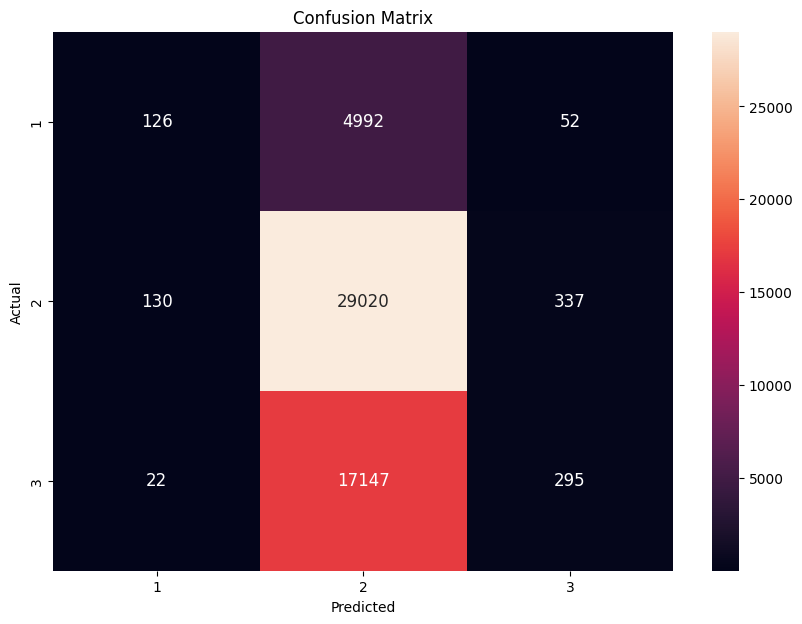

In [17]:
data = confusion_matrix(y_test,predictions_test)
cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.show()